<a href="https://colab.research.google.com/github/Znerf/diabetes-detection/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install xgboost==1.7.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/dataset_diabetes.csv')

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
y= df['Diabetes_binary']

X=df.drop('Diabetes_binary',axis=1)
# y.head()

# X.head()


In [ ]:
# Create a StratifiedKFold object
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores = []

In [ ]:


# Iterate through the folds
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set parameters for the XGBoost model
    params = {
      'objective': 'binary:logistic',
      'eval_metric': 'logloss',
      'eta': 0.1,
      'max_depth': 3
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions on the test set
    y_pred = model.predict(dtest)

    # Evaluate the predictions and store the accuracy score
    accuracy = accuracy_score(y_test, y_pred.round())
    accuracy_scores.append(accuracy)

    print(f"Fold {fold + 1}: Accuracy = {accuracy}")



Fold 1: Accuracy = 0.7524577410000707
Fold 2: Accuracy = 0.7523162882806422
Fold 3: Accuracy = 0.7518036497382939
Fold 4: Accuracy = 0.7514499929268638
Fold 5: Accuracy = 0.7523695006365823


In [ ]:
# Calculate the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {average_accuracy}")

Average Accuracy: 0.7520794345164906


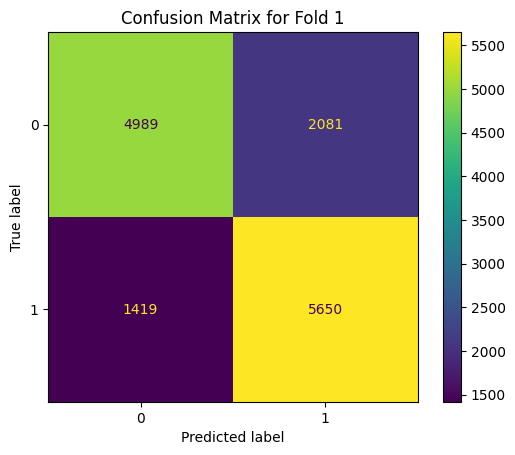

Fold 1: Accuracy = 0.7524577410000707, Log Loss = 0.5003108296326705, AUC = 0.8322314014033823


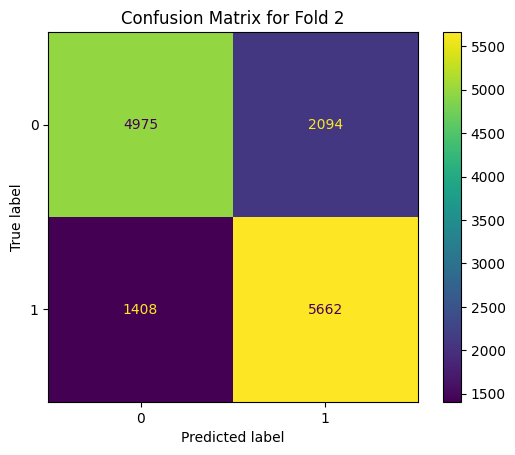

Fold 2: Accuracy = 0.7523162882806422, Log Loss = 0.5067775729144836, AUC = 0.8272256618584681


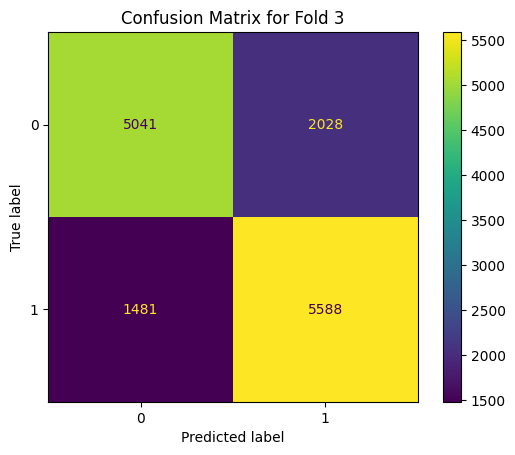

Fold 3: Accuracy = 0.7518036497382939, Log Loss = 0.5007188412180601, AUC = 0.8312684091402972


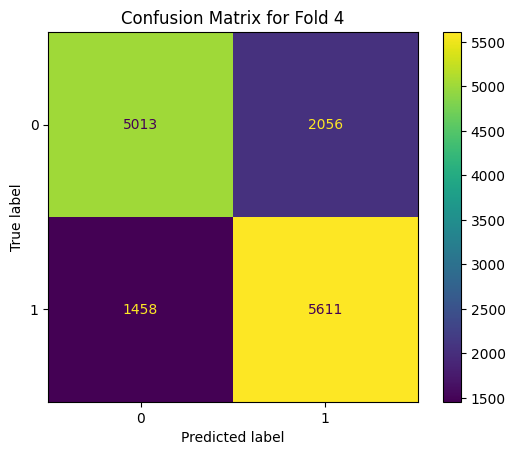

Fold 4: Accuracy = 0.7514499929268638, Log Loss = 0.5037419527263902, AUC = 0.8291952868198265


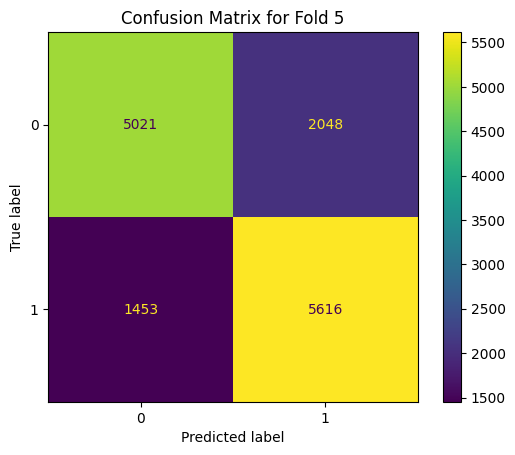

Fold 5: Accuracy = 0.7523695006365823, Log Loss = 0.4989945719148455, AUC = 0.8328057881688053


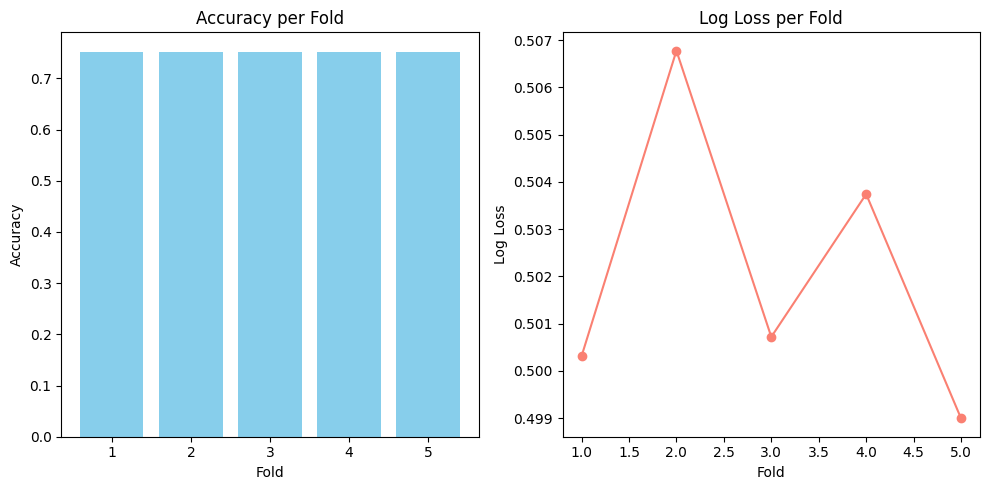

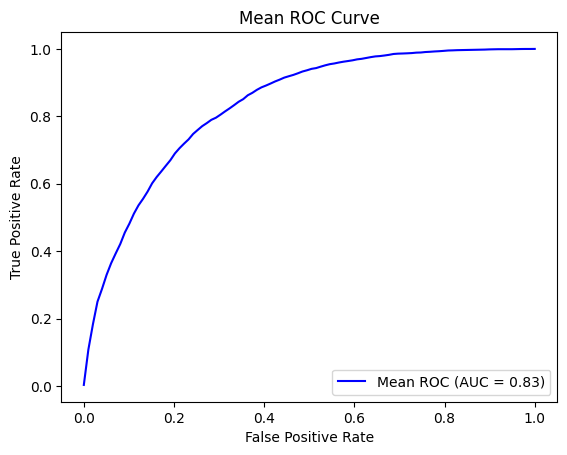

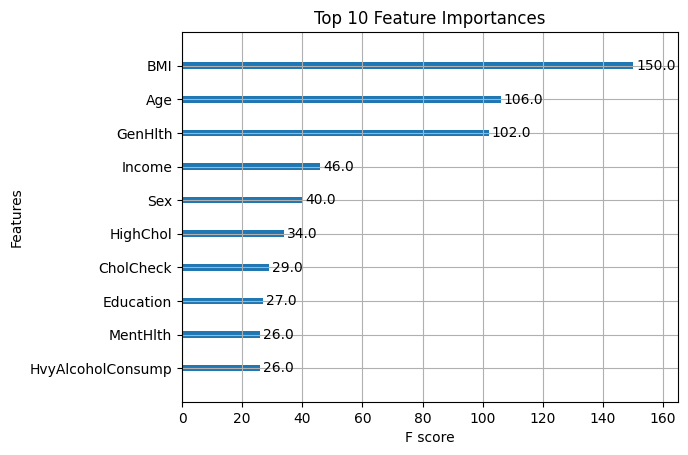

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, log_loss, precision_recall_curve
import xgboost as xgb

# Lists to hold metric values across folds
accuracy_scores = []
roc_auc_scores = []
log_losses = []
precision_scores = []
recall_scores = []
thresholds = []

# Loop for each fold
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Set parameters for the XGBoost model
    params = {
      'objective': 'binary:logistic',
      'eval_metric': 'logloss',
      'eta': 0.1,
      'max_depth': 3
    }

    # Train the model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Make predictions on the test set
    y_pred_prob = model.predict(dtest)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    logloss_value = log_loss(y_test, y_pred_prob)
    accuracy_scores.append(accuracy)
    log_losses.append(logloss_value)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

    print(f"Fold {fold + 1}: Accuracy = {accuracy}, Log Loss = {logloss_value}, AUC = {roc_auc}")

# Visualization of Accuracy and Log Loss per Fold
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(accuracy_scores)+1), accuracy_scores, color='skyblue')
plt.title("Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, len(log_losses)+1), log_losses, marker='o', color='salmon')
plt.title("Log Loss per Fold")
plt.xlabel("Fold")
plt.ylabel("Log Loss")
plt.tight_layout()
plt.show()

# Mean ROC Curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, roc_curve(y_test, y_pred_prob)[0], roc_curve(y_test, y_pred_prob)[1]) for _, (train_index, test_index) in enumerate(skf.split(X, y))], axis=0)
mean_roc_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Mean ROC (AUC = {mean_roc_auc:.2f})', color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
xgb.plot_importance(model, max_num_features=10, title='Top 10 Feature Importances')
plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset

# Load the data
file_path = '/content/drive/MyDrive/Data/dataset_diabetes.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Inspect data
print(data.info())
print(data.describe())

# Handle missing values
data.fillna(data.mean(), inplace=True)  # Replace missing values with the mean

# Separate features and target
X = data.drop('Diabetes_binary', axis=1).values  # Replace 'target' with your actual target column name
y = data['Diabetes_binary'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class DiabetesDetectionNN(nn.Module):
    def __init__(self, input_size):
        super(DiabetesDetectionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = DiabetesDetectionNN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}')

# Evaluation
model.eval()
y_pred = []
y_pred_proba = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch).squeeze()
        y_pred_proba.extend(outputs.numpy())
        y_pred.extend((outputs > 0.5).numpy().astype(int))

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/drive/MyDrive/Data/dataset_diabetes.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Inspect data
print(data.info())
print(data.head())

# Assume 'target' is the column with labels for diabetes (replace with actual column name)
# If it's not 'target', replace 'target' with the correct label column name
y = data['Diabetes_binary']  # Replace 'target' with your actual target column name
X = data.drop('Diabetes_binary', axis=1)  # Remove target from features

# Scale the data (normalize it to the same range expected by ResNet50)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data into images (21 columns -> reshape into a 5x5 image or similar shape)
image_size = 21  # Adjust to a suitable size
X_images = []

# Reshape each row into an image-like format (e.g., 5x5) and repeat channels to make it RGB
for row in X_scaled:
    img = row.reshape((image_size, image_size))  # Create a 5x5 grid
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension for grayscale
    img = np.repeat(img, 3, axis=-1)  # Convert to RGB by repeating the grayscale channel
    X_images.append(img)

# Convert to numpy array
X_images = np.array(X_images)

# Visualize the first image (optional)
plt.imshow(X_images[0])
plt.show()

# Load the pre-trained ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Add custom layers for transfer learning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (change if necessary)

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the base ResNet50 layers to avoid retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.4f}, Loss: {loss:.4f}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

ValueError: cannot reshape array of size 21 into shape (21,21)

In [16]:
!pip install matplotlib seaborn tensorflow


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam


In [18]:
# Load the dataset (replace with your actual file path)
file_path = '/content/drive/MyDrive/Data/dataset_diabetes.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Diabetes_binary', axis=1)  # Features (21 columns)
y = data['Diabetes_binary']  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Reshape each row into a grid (e.g., 7x3 grid for 21 features)
image_size_x = 7  # Number of rows
image_size_y = 3  # Number of columns
X_images = []

for row in X_scaled:
    img = row.reshape((image_size_x, image_size_y))  # Reshape into a grid (7x3)
    # X_images.append(img)
    img = tf.image.resize(img, (32, 32))  # Resize image to 32x32
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)
    img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel
    X_images.append(img)

# Convert list to numpy array
X_images = np.array(X_images)

# Visualize one "image" (optional)
plt.imshow(X_images[0], cmap='viridis')  # Use 'viridis' colormap
plt.colorbar()  # Adds a color scale
plt.show()


ValueError: 'images' must have either 3 or 4 dimensions.

In [26]:
# Initialize ResNet50 with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size_x, image_size_y, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_images, y, epochs=10, batch_size=32, validation_split=0.2)


ValueError: Input size must be at least 32x32; Received: input_shape=(7, 3, 3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset (replace with your actual file path)
file_path = '/content/drive/MyDrive/Data/dataset_diabetes.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Diabetes_binary', axis=1)  # Features (21 columns)
y = data['Diabetes_binary']  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape each row into a grid (7x3 grid for 21 features)
image_size_x = 7  # Number of rows
image_size_y = 3  # Number of columns
X_images = []

for row in X_scaled:
    img = row.reshape((image_size_x, image_size_y))  # Reshape into a grid (7x3)
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)
    img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel
    X_images.append(img)

# Convert list to numpy array
X_images = np.array(X_images)

# Optional: Resize the image to a minimum of 32x32 for ResNet50
X_images_resized = tf.image.resize(X_images, (32, 32))

# Initialize a ResNet50 model with custom input shape (32x32)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_images_resized, y, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_images_resized, y)
print(f'Accuracy: {accuracy:.4f}, Loss: {loss:.4f}')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 317s 174ms/step - accuracy: 0.6763 - loss: 0.5993 - val_accuracy: 0.6276 - val_loss: 0.6917
Epoch 2/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 341s 185ms/step - accuracy: 0.7085 - loss: 0.5422 - val_accuracy: 0.5453 - val_loss: 0.7743
Epoch 3/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 327s 185ms/step - accuracy: 0.7145 - loss: 0.5384 - val_accuracy: 0.6068 - val_loss: 0.7265
Epoch 4/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 381s 185ms/step - accuracy: 0.7226 - loss: 0.5337 - val_accuracy: 0.5879 - val_loss: 0.7788
Epoch 5/10
1768/1768 ━━━━━━━━━━━━━━━━━━━━ 382s 185ms/step - accuracy: 0.7215 - loss: 0.5319 - val_accuracy: 0.6849 - val_loss: 0.6479
Epoch 6/10
 646/1768 ━━━━━━━━━━━━━━━━━━━━ 2:59 160ms/step - accuracy: 0.7265 - loss: 0.5250

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset (replace with your actual file path)
file_path = '/content/drive/MyDrive/Data/dataset_diabetes.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Diabetes_binary', axis=1)  # Features (21 columns)
y = data['Diabetes_binary']  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape each row into a grid (7x3 grid for 21 features)
image_size_x = 7  # Number of rows
image_size_y = 3  # Number of columns
X_images = []

for row in X_scaled:
    img = row.reshape((image_size_x, image_size_y))  # Reshape into a grid (7x3)
    img = np.expand_dims(img, axis=-1)  # Add channel dimension (grayscale)
    img = np.repeat(img, 3, axis=-1)  # Convert grayscale to RGB by repeating the channel
    X_images.append(img)

# Convert list to numpy array
X_images = np.array(X_images)

# Optional: Resize the image to a minimum of 32x32 for ResNet50
X_images_resized = tf.image.resize(X_images, (32, 32))

# Initialize a ResNet50 model with custom input shape (32x32)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_images_resized, y, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_images_resized, y)
print(f'Accuracy: {accuracy:.4f}, Loss: {loss:.4f}')
